שאלות המחקר המבוקשות הן:
1. מהי רמת הקורלציה בין ריכוז בבדיקות השונות, תנועה בבדיקות השונות, מבנה בבדיקות השונות.
2. האם ניתן להגיע לנוסחה מסוימת ולפיה ככלל סטיית התקן שבין שתי הבדיקות דומה פחות או יותר.
3. האם יש קשר בין מקום ביצוע בדיקת הכוסית לבין הקורלציה בנתונים השונים של הבדיקות (דהיינו האם עדיף לשלוח למקום שבו עושים הרבה בדיקות כוסית כי אז הן יהיו יותר מדויקות או שאין משמעות).
4. האם דגימה של כוסית בנפח גבוה יותר (מעל 0.5 מ"ל או מעל 1 מ"ל) נותנת נתונים אמינים יותר?

In [51]:
import xlrd
import pandas as pd
import seaborn as sns

# df = pd.read_excel("check.xls", na_values=['לא ידוע', 'אין'])
df = pd.ExcelFile("https://github.com/aviadm24/jupyter/blob/master/check.xls?raw=true")
df = pd.read_excel(df, na_values=['לא ידוע', 'טיפה']) #  , 'אין'
df.columns = ["id", "hospital", "valume", "con_cup", "con_check", "movement_cup", "movement_check", "formation_cup", "formation_check"]
df.hospital = pd.Categorical(df.hospital)
df['code'] = df.hospital.cat.codes
df['formation_cup'] = df['formation_cup'].map(lambda x: str(x).lstrip('WHO').rstrip('WHO'))
df['formation_check'] = df['formation_check'].map(lambda x: str(x).lstrip('WHO').rstrip('WHO'))

In [52]:
df.drop("hospital", axis=1)

,id,valume,con_cup,con_check,movement_cup,movement_check,formation_cup,formation_check,code
0,56674,NaN,0.2,2.0,0.0001,0.0001,0,2,0
1,57548,1.0,12.0,30.0,25,20,2,4,3
2,73934,0.5,0.8,0.5,38,20,אין,אין,3
3,75504,1.5,75.0,33.0,30,55,14,אין,0
4,76665,NaN,30.0,50.0,40,40,13,אין,2
...,...,...,...,...,...,...,...,...,...
120,100721,2.5,2.2,2.0,0,0,0,0,3
121,101131,3.0,14.0,8.0,36,50,7,0,0
122,101418,1.0,37.0,59.0,54,36,3,אין,3
123,101721,1.0,19.0,25.0,26,20,2,3,0


ניקוי הדטה כדי שנוכל לעבד אותו

In [53]:
import numpy as np
import numpy.ma as ma

for index,i in enumerate(df['formation_check']):
    if isinstance(i, str):
        try:
            df['formation_check'][index] = int(i)
        except:
            pass

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


מכיוון שיש בבדיקות מבנה ותזוזה שורות שבהן לא נעשה בדיקה אחת מתוך השניים לא מתייחסים לשורה זו

In [64]:
formationDf = pd.DataFrame()
formationDf["formation_cup"] = df["formation_cup"]
formationDf["formation_check"] = df["formation_check"]
print("row count: ", formationDf.shape[0])
formationDf = formationDf[df.formation_cup != 'אין']
print("row count: ", formationDf.shape[0])
formationDf = formationDf[df.formation_check != 'אין']
print("row count: ", formationDf.shape[0])
formationDf["formation_cup"] = formationDf["formation_cup"].astype("float")
formationDf["formation_check"] = formationDf["formation_check"].astype("float")
print(formationDf)

row count:  125
row count:  93
row count:  69
     formation_cup  formation_check
0              0.0              2.0
1              2.0              4.0
5              0.0              1.0
7              0.0              0.0
9              3.0              3.0
..             ...              ...
118            2.0              1.0
119            3.0              7.0
120            0.0              0.0
121            7.0              0.0
123            2.0              3.0

[69 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [61]:
movementDf = pd.DataFrame()
movementDf["movement_cup"] = df["movement_cup"]
movementDf["movement_check"] = df["movement_check"]
print("row count: ", movementDf.shape[0])
movementDf = movementDf[df.movement_cup != 'אין']
print("row count: ", movementDf.shape[0])
movementDf = movementDf[df.movement_check != 'אין']
print("row count: ", movementDf.shape[0])
movementDf["movement_cup"] = movementDf["movement_cup"].astype("float")
movementDf["movement_check"] = movementDf["movement_check"].astype("float")
print(movementDf)

row count:  125
row count:  121
row count:  121
     movement_cup  movement_check
0          0.0001          0.0001
1         25.0000         20.0000
2         38.0000         20.0000
3         30.0000         55.0000
4         40.0000         40.0000
..            ...             ...
120        0.0000          0.0000
121       36.0000         50.0000
122       54.0000         36.0000
123       26.0000         20.0000
124        4.0000         47.0000

[121 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


חישוב קורלציה בין ריכוז בבדיקות השונות, תנועה בבדיקות השונות, מבנה בבדיקות השונות - בכלל בתי החולים

standard error:  0.08349603139077025


AttributeError: ignored

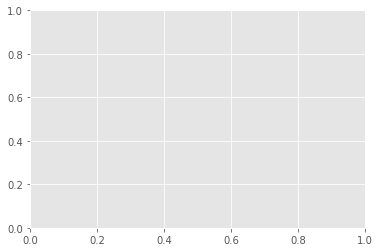

In [85]:
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def regresion(df, colOne, colTwo, title):
  x = df[colOne].fillna(0)
  y = df[colTwo].fillna(0)
  slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
  print("standard error: ", stderr)
  line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
  fig, ax = plt.subplots()
  ax.plot(x, y, linewidth=0, marker='s', label='Data points', title=title)
  ax.plot(x, intercept + slope * x, label=line)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend(facecolor='white')
  plt.show()
regresion(movementDf, "movement_cup", "movement_check", 'regresion movement')
regresion(formationDf, "formation_cup", "formation_check", 'regresion formation')
regresion(df, "con_cup", "con_check", 'regresion consertrat')

In [67]:
corr_movement = movementDf["movement_cup"].corr(movementDf["movement_check"])
corr_consertrat = df["con_cup"].corr(df["con_check"])
corr_formation = formationDf["formation_cup"].corr(formationDf["formation_check"])


corr_movement:  0.6318152917636762
corr_consertrat:  0.7138309800573162
corr_formation:  0.6590311986439481


Text(0, 0.5, 'corralation')

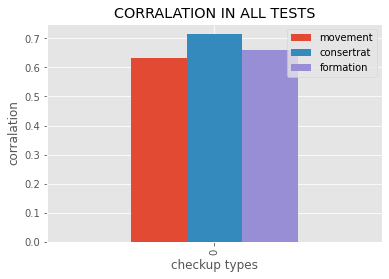

In [68]:
corrDf = pd.DataFrame()
corrDf["movement"] = [corr_movement]
corrDf["consertrat"] = [corr_consertrat]
corrDf["formation"] = [corr_formation]
print("corr_movement: ", corr_movement)
print("corr_consertrat: ", corr_consertrat)
print("corr_formation: ", corr_formation)
plt = corrDf.plot(kind='bar', title = "CORRALATION IN ALL TESTS")
plt.set_xlabel("checkup types")
plt.set_ylabel("corralation")  

השוואה של תזוזה בבדיקות כוסית ומבחנה

In [69]:
# plotDf = pd.DataFrame()
# plotDf["moveCup"] = df["movement_cup"]
# plotDf["moveCheck"] = df["movement_check"]

Text(0, 0.5, 'number of tests made')

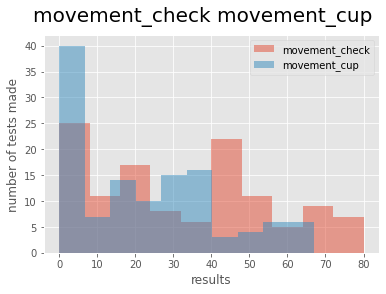

In [70]:
import matplotlib.pyplot as plt
title = ''
for col in ["movement_check","movement_cup"]:
    plt.hist(movementDf[col], alpha=0.5, label=col)
    title+=col + ' '
plt.suptitle(title, fontsize=20)
plt.legend(loc="upper right")
plt.xlabel("results")
plt.ylabel("number of tests made")  

In [71]:
# title = ''
# plotDf = df[["formation_check","formation_cup"]].copy()
# plotDf["formation_check"] = plotDf["formation_check"].astype(float)
# plotDf["formation_cup"] = plotDf["formation_cup"].astype(float)
# print(plotDf)


Text(0, 0.5, 'number of tests made')

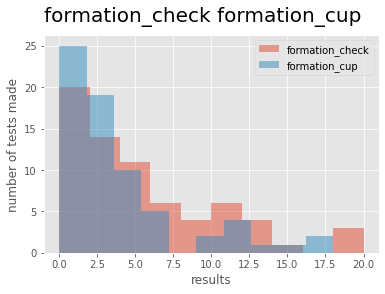

In [73]:
title = ''
for col in ["formation_check","formation_cup"]:
    plt.hist(formationDf[col], alpha=0.5, label=col)
    title+=col + ' '
plt.suptitle(title, fontsize=20)
plt.legend(loc="upper right")
plt.xlabel("results")
plt.ylabel("number of tests made")  

Text(0, 0.5, 'number of tests made')

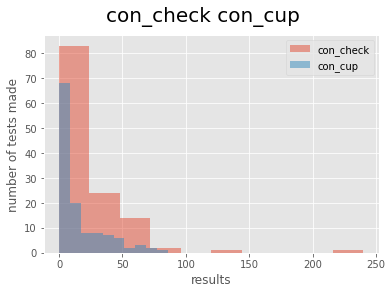

In [74]:
title = ''
plotDf = df[["con_check","con_cup"]].copy()
plotDf["con_check"] = plotDf["con_check"].astype(float)
plotDf["con_cup"] = plotDf["con_cup"].astype(float)
for col in ["con_check","con_cup"]:
    plt.hist(plotDf[col], alpha=0.5, label=col)
    title+=col + ' '
plt.suptitle(title, fontsize=20)
plt.legend(loc="upper right")
plt.xlabel("results")
plt.ylabel("number of tests made")  

השוואה של קורלציה לפי בית חולים - בוטל

In [12]:
# move_list = []
# consert_list = []
# formation_list = []
# group_names = df.hospital.unique()
# for i, name in enumerate(group_names):
# # for i in range(len(df.groupby(['hospital']))):
#     hospital = df.groupby(['hospital']).get_group(name)
#     print("number ", i, "is ", name)
# # for i in range(len(df.groupby(['code']).groups)):
#     # hospital_acher = df.groupby(['code']).get_group(i)
#     corr_movement = hospital["movement_cup"].corr(hospital["movement_check"])
#     corr_consertrat = hospital["con_cup"].corr(hospital["con_check"])
#     corr_formation = hospital["formation_cup"].astype('float').corr(hospital["formation_check"].astype('float'))
#     move_list.append(corr_movement)
#     consert_list.append(corr_consertrat)
#     formation_list.append(corr_formation)
# corr_df = pd.DataFrame()
# corr_df["corr_movement"] = move_list
# corr_df["corr_consertrat"] = consert_list
# corr_df["corr_formation"] = formation_list
# corr_df.plot()

רואים שבבית החולים ביקור חולים יש הבדל גדול בקורלציה בין התזוזה לבין מבנה וריכוז

**קורלציה לפי נפח**

In [80]:
# group_names = df.hospital.unique()
# def plotCorrByHospital(df):
#   for name in group_names:
#   # for i in range(len(df.groupby(['hospital']))):
#     hospital_number = df.groupby(['hospital']).get_group(name)
#     corr_movement = hospital_number["movement_cup"].corr(hospital_number["movement_check"])
#     corr_consertrat = hospital_number["con_cup"].corr(hospital_number["con_check"])
#     corr_formation = hospital_number["formation_cup"].astype('float').corr(hospital_number["formation_check"].astype('float'))
#     corr_df = pd.DataFrame()
#     corr_df["corr_movement"] = [corr_movement]
#     corr_df["corr_consertrat"] = [corr_consertrat]
#     corr_df["corr_formation"] = [corr_formation]
#     plt = corr_df.plot(kind="bar", title = name)
#     plt.set_xlabel("x label")
#     plt.set_ylabel("y label")
# plotCorrByHospital(df)

def getCorrAndPlot(df, **kwargs):
  print(kwargs)

  df = df[df.formation_cup != 'אין']
  df = df[df.formation_check != 'אין']
  df = df[df.movement_cup != 'אין']
  df = df[df.movement_check != 'אין']
  df["formation_cup"] = df["formation_cup"].astype("float")
  df["formation_check"] = df["formation_check"].astype("float")
  df["movement_cup"] = df["movement_cup"].astype("float")
  df["movement_check"] = df["movement_check"].astype("float")

  corr_movement = df["movement_cup"].corr(df["movement_check"])
  corr_consertrat = df["con_cup"].corr(df["con_check"])
  corr_formation = df["formation_cup"].corr(df["formation_check"])
  corr_df = pd.DataFrame()
  corr_df["corr_movement"] = [corr_movement]
  corr_df["corr_consertrat"] = [corr_consertrat]
  corr_df["corr_formation"] = [corr_formation]
  print("corr_movement: ", corr_movement)
  print("corr_consertrat: ", corr_consertrat)
  print("corr_formation: ", corr_formation)

  plt = corr_df.plot(kind="bar", title = kwargs['name'])
  plt.set_xlabel("types")
  plt.set_ylabel("corralation")  

In [81]:
df['valume'] = df['valume'].astype(float)

{'name': 'under 1'}
corr_movement:  0.6281528151097434
corr_consertrat:  0.5465592294339519
corr_formation:  0.6785341186815933


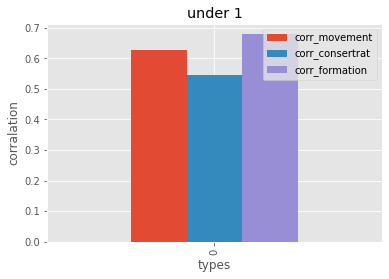

In [82]:
getCorrAndPlot(df[df.valume < 1], name="under 1")


{'name': 'over 1'}
corr_movement:  0.6379879285633447
corr_consertrat:  0.8495501984460926
corr_formation:  0.655500134101425


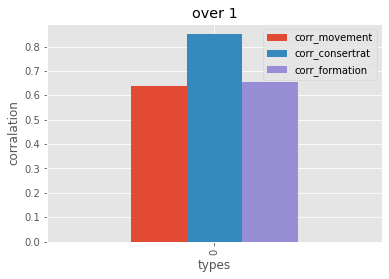

In [83]:
getCorrAndPlot(df[df.valume >= 1], name="over 1")